In [1]:
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from scipy.signal import resample
import os

In [2]:
# Load the locs_corrected.mat file
locs_file = 'C:/Users/odans/Documents/SUSSEX LAB WORKS/Dissertation Analysis/ba/locs corrected.mat'
locs_data = sio.loadmat(locs_file)

# Extract MNI coordinates and lobes data
mni_coordinates = locs_data['MNI']
lobes_data = locs_data['lobes']

# Create a DataFrame for easier manipulation
columns = ['X', 'Y', 'Z']
mni_df = pd.DataFrame(mni_coordinates, columns=columns)
mni_df['Lobe'] = lobes_data

# Display the DataFrame
mni_df

,X,Y,Z,Lobe
0,-11.191068,-41.829697,-1.251745,Cingulate
1,-35.1131,-38.2053,-36.9623,Temporal
2,-71.410723,-38.814200,-3.185324,Temporal
3,-3.278707,-80.668509,7.062573,Occipital
4,-39.896063,-79.783265,3.085811,Occipital
5,-6.316035,-53.929663,28.109325,Cingulate
6,-4.287305,-75.585350,14.106839,Occipital
7,-56.807197,-75.185087,23.395060,Parietal
8,-1.982246,-76.176692,22.002690,Occipital
9,-52.964571,-72.850765,34.077742,Parietal


In [3]:
mni_df.to_csv('mni_coordinates_lobes.csv', index=False)
print("Data has been saved to 'mni_coordinates_lobes.csv'")

Data has been saved to 'mni_coordinates_lobes.csv'


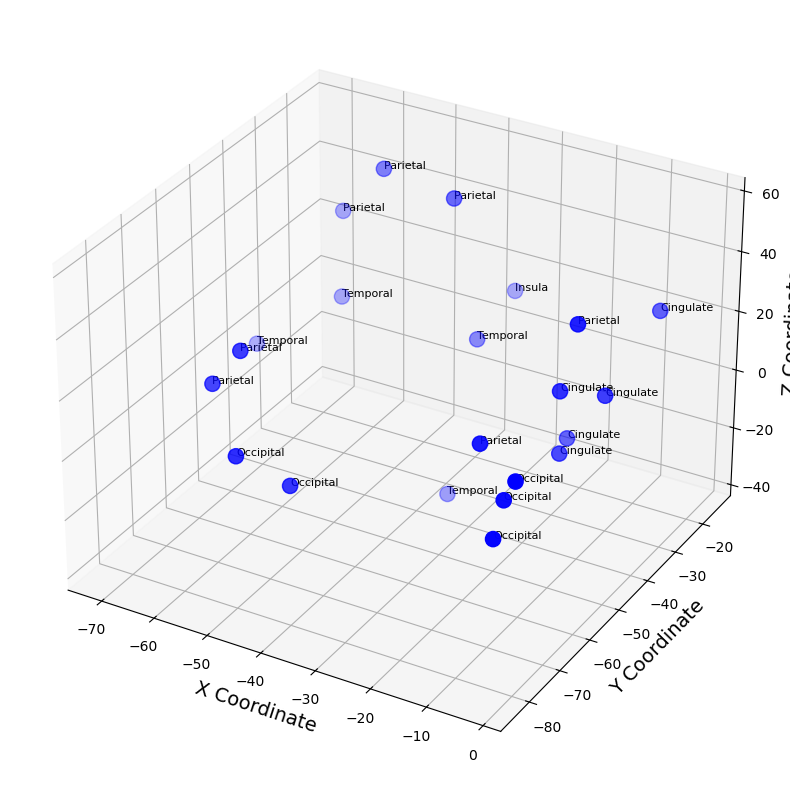

In [4]:
# Convert coordinates to float
mni_df = mni_df.astype({'X': 'float', 'Y': 'float', 'Z': 'float'})

# Set the figure size (width, height) in inches
fig = plt.figure(figsize=(12, 10)) 
ax = fig.add_subplot(111, projection='3d')

# Increase point size using 's' parameter
sc = ax.scatter(mni_df['X'], mni_df['Y'], mni_df['Z'], c='b', marker='o', s=120) 

# Increase font size of text labels
for i, lobe in enumerate(mni_df['Lobe']):
    ax.text(mni_df['X'][i], mni_df['Y'][i], mni_df['Z'][i], '%s' % (lobe), size=8, zorder=1, color='k')

# Increase font size of axis labels and title
ax.set_xlabel('X Coordinate', fontsize=14)
ax.set_ylabel('Y Coordinate', fontsize=14)
ax.set_zlabel('Z Coordinate', fontsize=14)
#plt.title('3D Scatter Plot of Electrode Positions', fontsize=16)
#ax.grid(False)

plt.show()

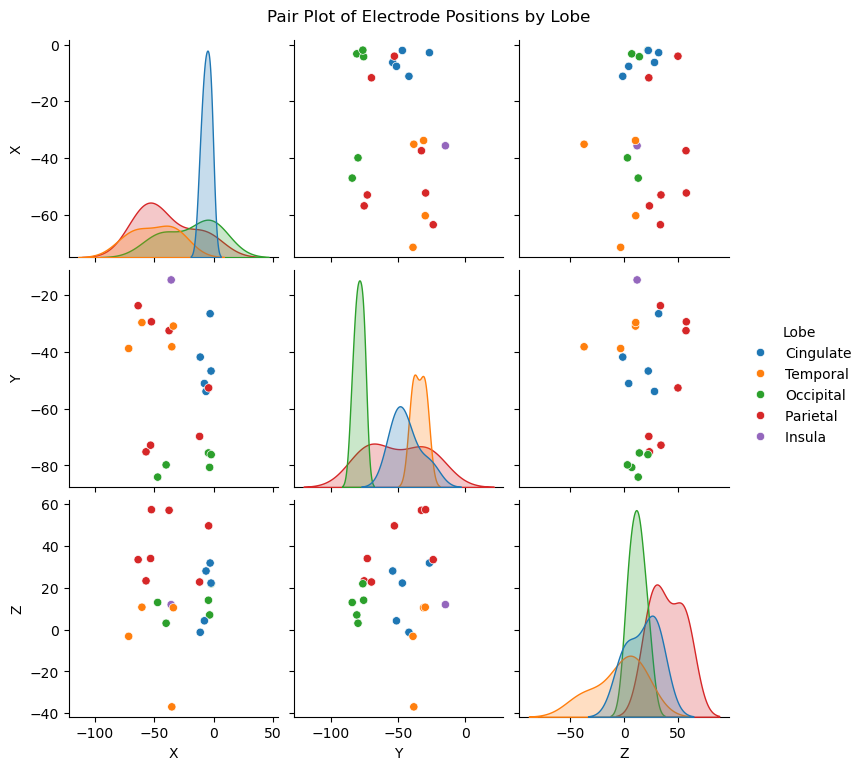

In [5]:
# Load the locs_corrected.mat file
locs_file = 'C:/Users/odans/Documents/SUSSEX LAB WORKS/Dissertation Analysis/ba/locs corrected.mat'
locs_data = sio.loadmat(locs_file)

# Extract MNI coordinates and lobes data
mni_coordinates = locs_data['MNI']
lobes_data = locs_data['lobes']

# Create a DataFrame for easier manipulation
columns = ['X', 'Y', 'Z']
mni_df = pd.DataFrame(mni_coordinates, columns=columns)
mni_df['Lobe'] = lobes_data

# Convert coordinates to float
mni_df = mni_df.astype({'X': 'float', 'Y': 'float', 'Z': 'float'})

# Create a pair plot
sns.pairplot(mni_df, hue='Lobe', palette='tab10')
plt.suptitle('Pair Plot of Electrode Positions by Lobe', y=1.02)

plt.show()

### Load and Downsample Sleep Data

In [7]:
# Function to load and downsample data
def load_and_downsample(filepath, target_freq=250):
    data = sio.loadmat(filepath)['dat']
    original_freq = 1000  # Hz
    downsample_factor = original_freq // target_freq
    downsampled_data = resample(data, data.shape[1] // downsample_factor, axis=1)
    return downsampled_data

# Paths and participants
base_path = 'C:/Users/odans/Documents/SUSSEX LAB WORKS/Dissertation Analysis'
participants = ['ba', 'fe', 'fr', 'gi', 'me', 'pa', 'pe', 'te', 'to', 'za']
states = ['E', 'L', 'R', 'W']

# Dictionary to store all data
all_data = {}

# Load and downsample data for all participants and states
for participant in participants:
    all_data[participant] = {}
    for state in states:
        filepath = os.path.join(base_path, participant, f'{state}1000.mat')
        downsampled_data = load_and_downsample(filepath)
        all_data[participant][state] = downsampled_data

# Print the structure of the loaded data
for participant, states_data in all_data.items():
    for state, data in states_data.items():
        print(f"Participant: {participant}, State: {state}, Data shape: {data.shape}")

Participant: ba, State: E, Data shape: (22, 227500)
Participant: ba, State: L, Data shape: (22, 160250)
Participant: ba, State: R, Data shape: (22, 240000)
Participant: ba, State: W, Data shape: (22, 150750)
Participant: fe, State: E, Data shape: (23, 187000)
Participant: fe, State: L, Data shape: (23, 150250)
Participant: fe, State: R, Data shape: (23, 209250)
Participant: fe, State: W, Data shape: (23, 159025)
Participant: fr, State: E, Data shape: (18, 157500)
Participant: fr, State: L, Data shape: (18, 161750)
Participant: fr, State: R, Data shape: (18, 156500)
Participant: fr, State: W, Data shape: (18, 152500)
Participant: gi, State: E, Data shape: (22, 168750)
Participant: gi, State: L, Data shape: (22, 149750)
Participant: gi, State: R, Data shape: (22, 166500)
Participant: gi, State: W, Data shape: (22, 171750)
Participant: me, State: E, Data shape: (23, 163500)
Participant: me, State: L, Data shape: (23, 176500)
Participant: me, State: R, Data shape: (23, 161500)
Participant:

### Combine with Electrode Position Data

In [9]:
# Load the locs_corrected.mat file
locs_file = 'C:/Users/odans/Documents/SUSSEX LAB WORKS/Dissertation Analysis/ba/locs corrected.mat'
locs_data = sio.loadmat(locs_file)

# Extract MNI coordinates and lobes data
mni_coordinates = locs_data['MNI']
lobes_data = locs_data['lobes']

# Convert coordinates to float
mni_df = pd.DataFrame(mni_coordinates, columns=['X', 'Y', 'Z'])
mni_df = mni_df.astype({'X': 'float', 'Y': 'float', 'Z': 'float'})
mni_df['Lobe'] = lobes_data

# Display the DataFrame
print("MNI Coordinates and Lobes Data")
print(mni_df)

MNI Coordinates and Lobes Data
            X          Y          Z       Lobe
0  -11.191068 -41.829697  -1.251745  Cingulate
1  -35.113100 -38.205300 -36.962300  Temporal 
2  -71.410723 -38.814200  -3.185324  Temporal 
3   -3.278707 -80.668509   7.062573  Occipital
4  -39.896063 -79.783265   3.085811  Occipital
5   -6.316035 -53.929663  28.109325  Cingulate
6   -4.287305 -75.585350  14.106839  Occipital
7  -56.807197 -75.185087  23.395060  Parietal 
8   -1.982246 -76.176692  22.002690  Occipital
9  -52.964571 -72.850765  34.077742  Parietal 
10  -7.686120 -51.125914   4.256372  Cingulate
11 -11.714470 -69.758461  22.835359  Parietal 
12  -2.094191 -46.739684  22.323502  Cingulate
13 -37.391723 -32.532836  57.186558  Parietal 
14 -52.268996 -29.402571  57.476489  Parietal 
15  -4.112987 -52.682802  49.741404  Parietal 
16 -35.639422 -14.665292  12.014065  Insula   
17  -2.867660 -26.566254  31.934534  Cingulate
18 -33.801003 -30.913921  10.532425  Temporal 
19 -60.271709 -29.677352  10.

### Mean Activity Per Lobe

In [11]:
# Dictionary to store all data
all_data = {}

# Load and downsample data for all participants and states
for participant in participants:
    all_data[participant] = {}
    for state in states:
        filepath = os.path.join(base_path, participant, f'{state}1000.mat')
        downsampled_data = load_and_downsample(filepath)
        all_data[participant][state] = downsampled_data

# Print the structure of the loaded data
for participant, states_data in all_data.items():
    for state, data in states_data.items():
        print(f"Participant: {participant}, State: {state}, Data shape: {data.shape}")

# Load the locs_corrected.mat file
locs_file = 'C:/Users/odans/Documents/SUSSEX LAB WORKS/Dissertation Analysis/ba/locs corrected.mat'
locs_data = sio.loadmat(locs_file)

# Extract MNI coordinates and lobes data
mni_coordinates = locs_data['MNI']
lobes_data = locs_data['lobes']

# Convert coordinates to float
mni_df = pd.DataFrame(mni_coordinates, columns=['X', 'Y', 'Z'])
mni_df = mni_df.astype({'X': 'float', 'Y': 'float', 'Z': 'float'})
mni_df['Lobe'] = lobes_data

# Display the DataFrame
print("MNI Coordinates and Lobes Data")
print(mni_df)

# Function to calculate mean activity per lobe
def mean_activity_per_lobe(eeg_data, mni_df):
    lobes = mni_df['Lobe'].unique()
    mean_activity = {lobe: [] for lobe in lobes}
    
    for lobe in lobes:
        indices = mni_df[mni_df['Lobe'] == lobe].index
        indices = [i for i in indices if i < eeg_data.shape[0]]  # Ensure indices are within bounds
        if indices:  # Only calculate if there are valid indices
            mean_activity[lobe] = np.mean(eeg_data[indices, :], axis=0)
        else:
            mean_activity[lobe] = np.array([])  # Handle cases with no valid indices
    
    return mean_activity

# Calculate and print mean activity per lobe for each participant and state
mean_activities = {}

for participant in participants:
    mean_activities[participant] = {}
    for state in states:
        eeg_data = all_data[participant][state]
        mean_activity = mean_activity_per_lobe(eeg_data, mni_df)
        mean_activities[participant][state] = mean_activity

# Print the mean activities
for participant, states_data in mean_activities.items():
    for state, activity in states_data.items():
        print(f"Participant: {participant}, State: {state}, Mean Activity per Lobe: {activity}")


Participant: ba, State: E, Data shape: (22, 227500)
Participant: ba, State: L, Data shape: (22, 160250)
Participant: ba, State: R, Data shape: (22, 240000)
Participant: ba, State: W, Data shape: (22, 150750)
Participant: fe, State: E, Data shape: (23, 187000)
Participant: fe, State: L, Data shape: (23, 150250)
Participant: fe, State: R, Data shape: (23, 209250)
Participant: fe, State: W, Data shape: (23, 159025)
Participant: fr, State: E, Data shape: (18, 157500)
Participant: fr, State: L, Data shape: (18, 161750)
Participant: fr, State: R, Data shape: (18, 156500)
Participant: fr, State: W, Data shape: (18, 152500)
Participant: gi, State: E, Data shape: (22, 168750)
Participant: gi, State: L, Data shape: (22, 149750)
Participant: gi, State: R, Data shape: (22, 166500)
Participant: gi, State: W, Data shape: (22, 171750)
Participant: me, State: E, Data shape: (23, 163500)
Participant: me, State: L, Data shape: (23, 176500)
Participant: me, State: R, Data shape: (23, 161500)
Participant:

### Visualization Code

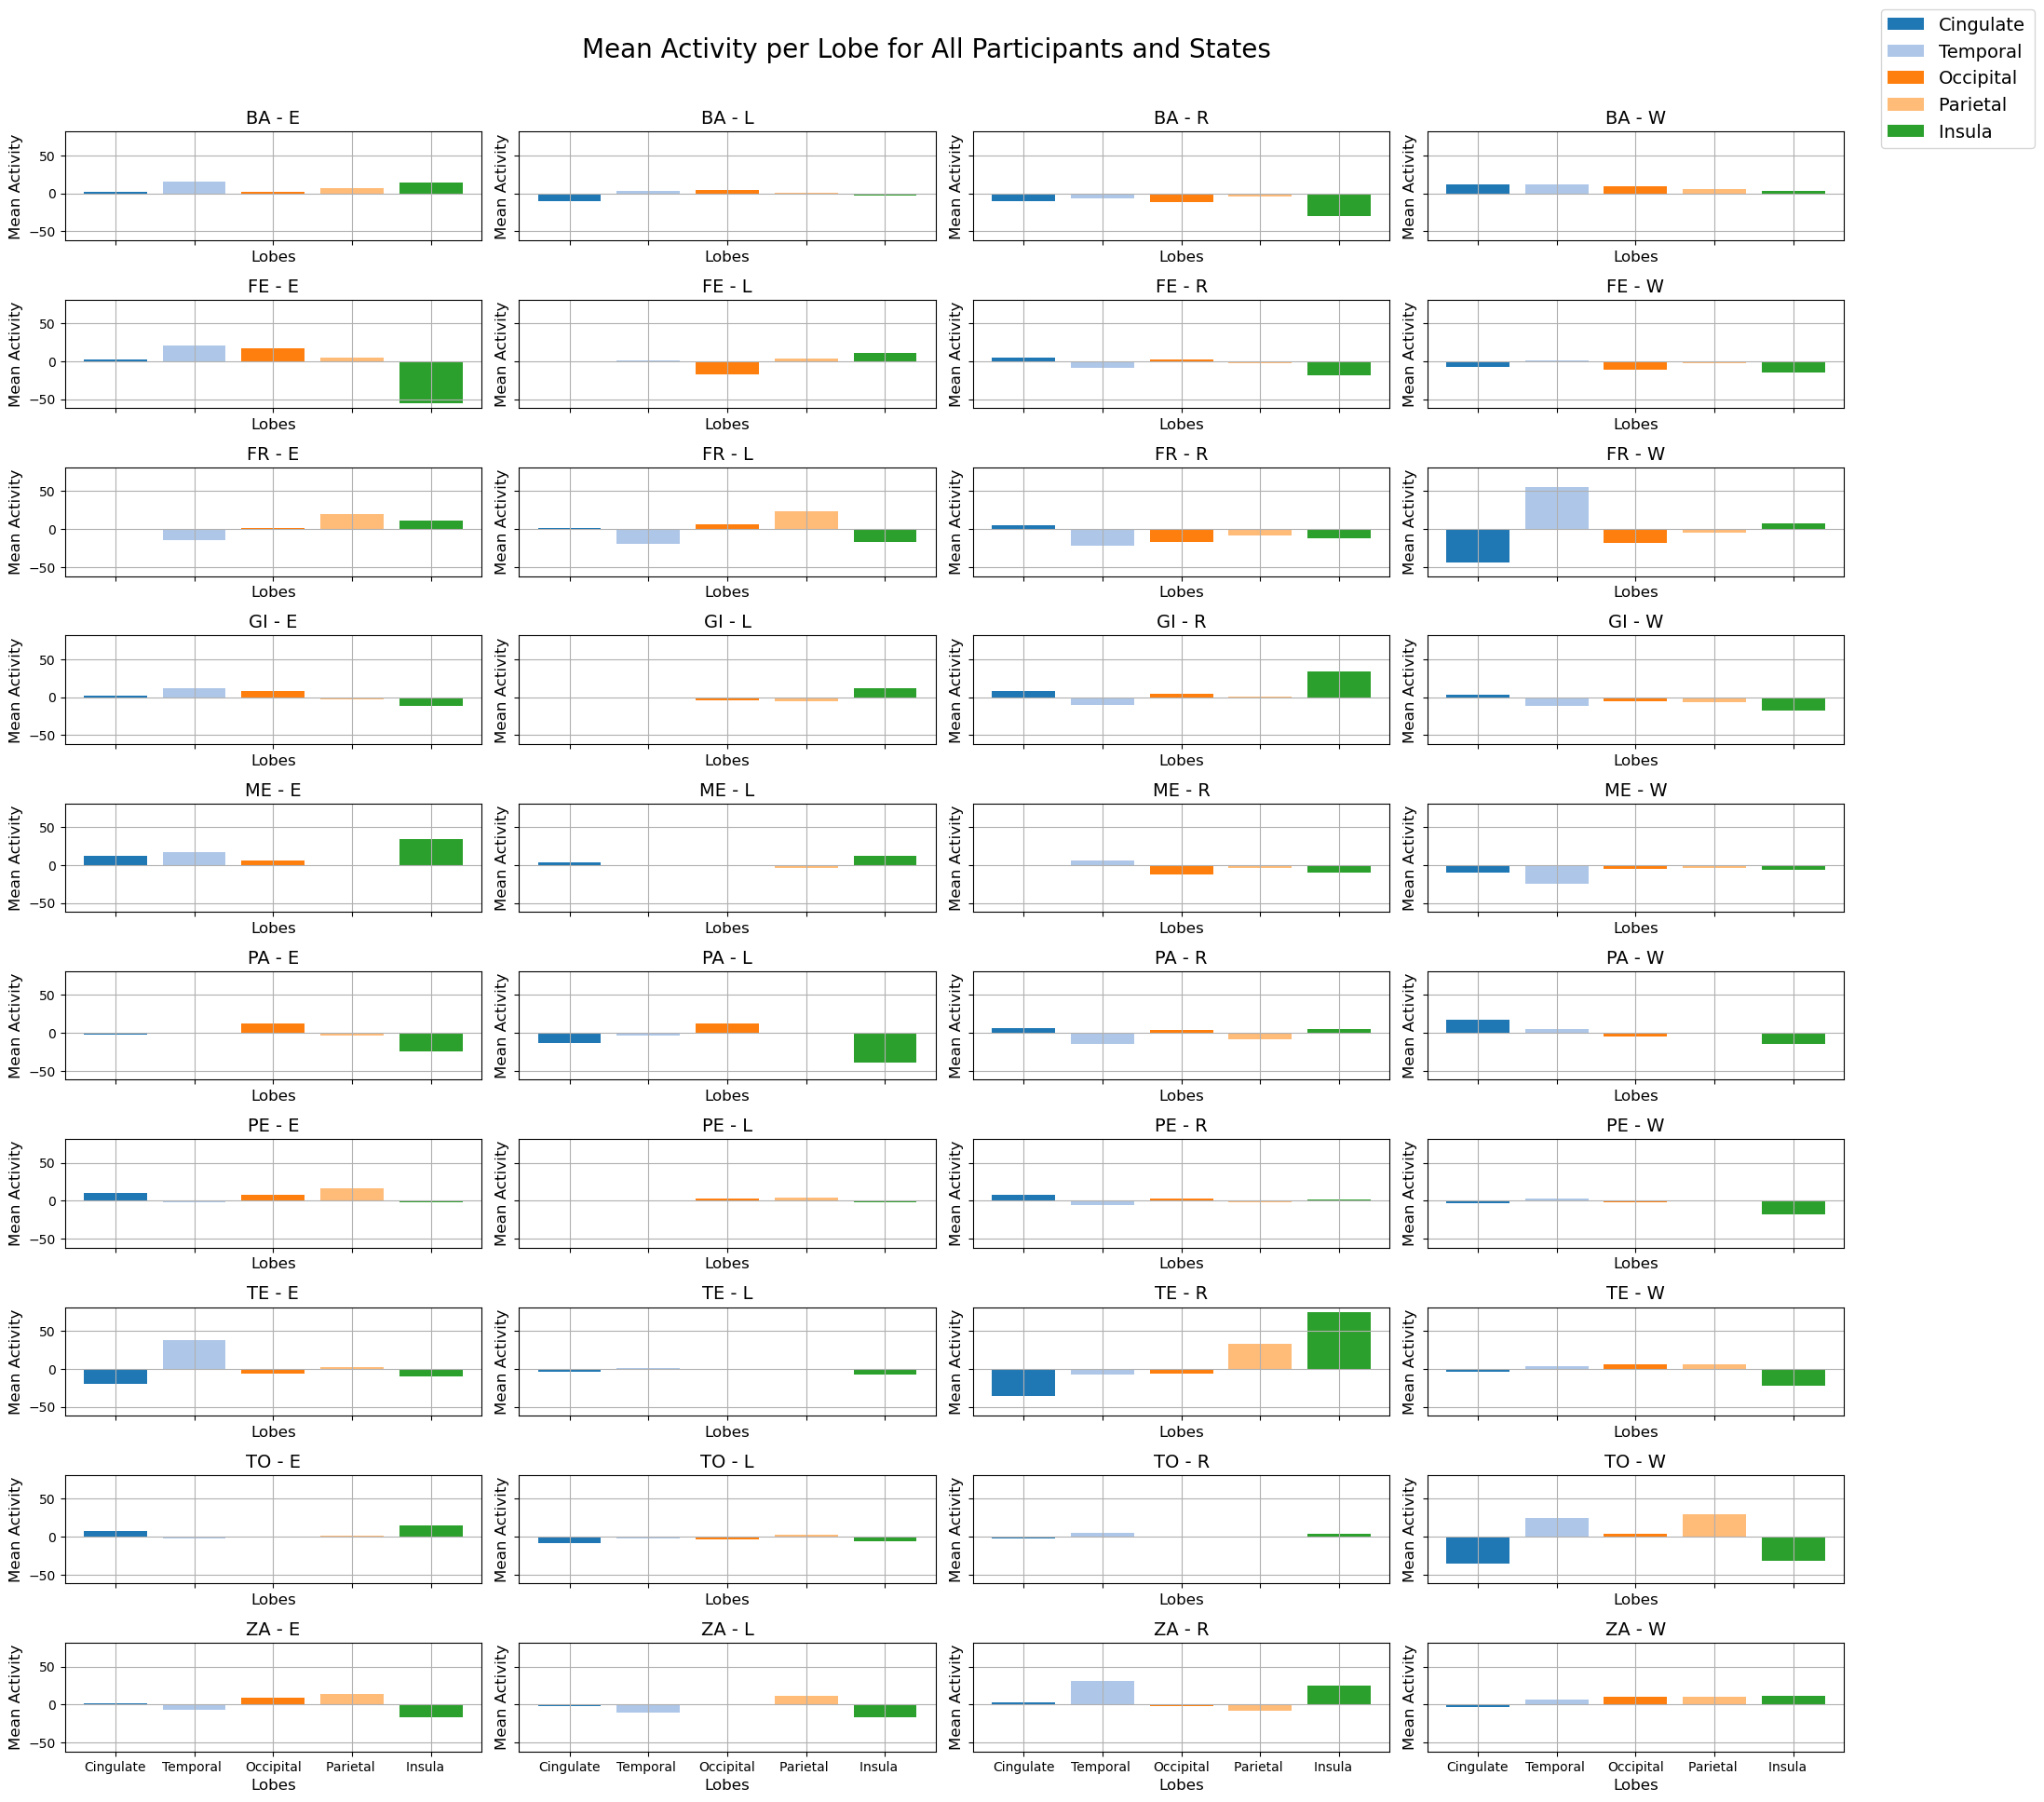

In [13]:
# Function to plot mean activity per lobe as a bar chart with different colors for each lobe
def plot_mean_activity_subplot(ax, mean_activities, participant, state, colors):
    mean_activity = mean_activities[participant][state]
    
    lobes = list(mean_activity.keys())
    activity_means = [np.mean(mean_activity[lobe]) for lobe in lobes]
    
    # Creating the bar chart with different colors
    bars = ax.bar(lobes, activity_means, color=colors[:len(lobes)])
    
    ax.set_title(f'{participant.upper()} - {state}', fontsize=14)  # Increased title font size
    ax.set_xlabel('Lobes', fontsize=12)  # Increased x-axis label font size
    ax.set_ylabel('Mean Activity', fontsize=12)  # Increased y-axis label font size
    ax.tick_params(axis='both', which='major', labelsize=10)  # Increased font size for tick labels
    ax.grid(True)
    
    return bars, lobes

# Determine the grid size
num_participants = len(participants)
num_states = len(states)

# Generate a color map
colors = plt.colormaps.get_cmap('tab20').colors  # 'tab20' provides 20 distinct colors

# Create a figure with subplots
fig, axs = plt.subplots(num_participants, num_states, figsize=(20, 20), sharex=True, sharey=True)

# Plotting the results for each participant and state
all_bars = []
all_lobes = []

for i, participant in enumerate(participants):
    for j, state in enumerate(states):
        bars, lobes = plot_mean_activity_subplot(axs[i, j], mean_activities, participant, state, colors)
        if i == 0 and j == 0:  # Collect legend info only from the first subplot
            all_bars = bars
            all_lobes = lobes

# Add a single legend based on the first subplot's bars
fig.legend(all_bars, all_lobes, loc='upper right', bbox_to_anchor=(1.1, 1), fontsize=14)  # Increased legend font size

plt.suptitle('Mean Activity per Lobe for All Participants and States', fontsize=20)  # Increased suptitle font size
plt.tight_layout(rect=[0, 0.03, 1, 0.97])

# Show the summary plot
plt.show()